In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Explicit Euler time stepping rule
Solve the IVP wit hthe explicit Euler for t in [0,2]. With x(t+h) = x(t) + h f(x(t)) with h = 0.01

In [61]:
t = np.arange(0,2.01,0.01)  # This is time with a timestep of 0.01
h = 0.01                    # This is the explicit timestep (fixed in this case)
print(h)
len(t)
#f(x,t) = -2x(t)

0.01


201

201


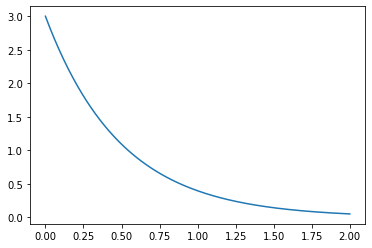

In [62]:
x=[3]                             # This is the initial condition
for i in range(1,len(t)):         # This is the for loop for the explicit method
    x.append(x[i-1]-h*2*x[i-1])   # This is the method using  x(t+h) = x(t) + h f(x(t)) 
print(len(x))
plt.plot(t,x)

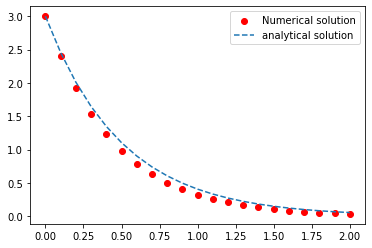

In [28]:
# How he made it
x0 = 3
h  = 0.1
T  = 2
N  = int(np.ceil(T/h))
def f(x):
    return -2*x
def Analytical_f(t):
    return 3*np.exp(-2*t)

xs = np.zeros(N+1)
ts = np.zeros(N+1)

xs[0] = 3
ts[0] = 0
for i in range(N):
    xs[i+1] = xs[i] + h*f(xs[i])
    ts[i+1] = ts[i] + h
plt.scatter(ts,xs,label='Numerical solution',color = 'r')
plt.plot(ts,Analytical_f(ts), label ='analytical solution',linestyle = '--' )
plt.legend()

# Explicit Runge - Kutta method

In [76]:
def integrate(f, x0, tspan, h, step):
    """
        Generic integrator interface

        inputs:
            f     - rhs of ODE to be integrated (signature: dx/dt = f(x,t))
            x0    - initial condition (numpy array)
            tspan - integration horizon (t0, tf) (tuple)
            h     - step size
            step   - integrator with signature: 
                        step(f,x,t,h) returns state at time t+h 
                        - f rhs of ODE to be integrated
                        - x current state
                        - t current time 
                        - h stepsize

        outputs: 
            ts - time points visited during integration (list)
            xs - trajectory of the system (list of numpy arrays)
    """
    t, tf = tspan
    x = x0
    trajectory = [x0]
    ts = [t]
    while t < tf:
        h_eff = min(h, tf-t)
        x = step(f,x,t,h_eff)
        t = min(t+h_eff, tf)
        trajectory.append(x)
        ts.append(t)
    return trajectory, ts

In [98]:
from numpy.linalg import norm
def function(x,t):
    return -2*x

def explicit_RK_stepper(f,x,t,h,a,b,c):
    """
        Implementation of generic explicit Runge-Kutta update for explicit ODEs
        
        inputs:
            x - current state 
            t - current time
            f - right-hand-side of the (explicit) ODE to be integrated (signature f(x,t))
            h - step size 
            a - coefficients of Runge-Kutta method (organized as list-of-list (or vector-of-vector))
            b - weights of Runge-Kutta method (list/vector)
            c - nodes of Runge-Kutta method (including 0 as first node) (list/vector)

        outputs: 
            x_hat - estimate of the state at time t+h
    """
    # x_hat(t[i+h]) = x(t[i]) + h * np.sum(b[i] * k[i])
    k = [f(x,t)]  # --> THIS IS NOT WORKING
    print(f(x,t))
    #print(t)
    for i in range(len(c)-1):
        x_aux = x + h * sum(a[i][j] * k[j] for j in range(len(k)))
        k.append(f(x_aux, t + c[i+1] * h))
    x_hat  = x + h * sum(b[index] * k[index] for index in range(len(k)))
        #k[t = 1] = f[x[t],t]
        #k[t = 2] = f[x[t] + h * (a[t,t-1] * k[t-1] ), t + c[t]*h]        
        #k[t = 3] = f[x[t] + h * (a[t,t-2] * k[t-2] + a[t,t-1] * k[t-1]), t + c[t] * h]
        #k[t = 4] = f[x[t] + h * (a[t,t-3] * k[t-3] + a[t,t-2] * k[t-1] + a[t,t-3] *k[t-3]) , t + c[t] * h]
        #k.append(f[x[i]+h * a[2,i],i])
    return x_hat # please complete this function 

In [99]:
a = [[1/5],
     [3/40, 9/40], 
     [44/45, -56/15, 32/9], 
     [19372/6561, -25360/2187, 64448/6561, -212/729],  
     [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656], 
     [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84]]
b = [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]
c = [0, 1/5, 3/10, 4/5, 8/9, 1, 1]
b_control = [5179/57600, 0, 7571/16695, 393/640, -92097/339200, 187/2100, 1/40]
t = np.arange(0,2.01,0.01) 

asdf = explicit_RK_stepper(function,3,t,0.1,a,b,c)
print(asdf)

-6
2.45619232


In [94]:
function(3,t)

-6

-6.0
-4.02192896
-2.6959854265477805
-1.8071769771284116
-1.2113895700263357
-0.812020465588478
-0.5443147711104971
-0.3648658902141799
-0.2445774483947651
-0.1639455204436352
-0.10989620608908805


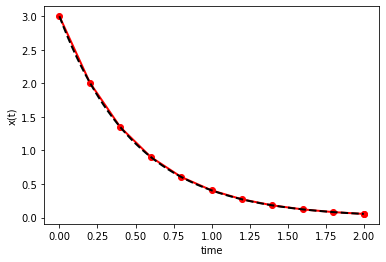

In [100]:
# numpy for fast arrays and some linear algebra.
import numpy as np 
# import matplotlib for plotting
import matplotlib.pyplot as plt
# import Dormand-Prince Butcher tableau
#import dormand_prince as dp
# import our Runge-Kutta integrators
#import runge_kutta as rk

def dormand_prince_integrator(f, x, t, h):
    return explicit_RK_stepper(f,x,t,h,a,b,c) # please complete this function
               # so it returns the prediction for the 
               # Dormand-Prince method 
               # To that end, use rk.explicit_rk_stepper!

# Feel free play around with the following quantities 
# and see how the solution changes!

# time horizon
tspan = (0.0,2.0)
# time step 
h = 0.2
# initial condition
x_0 = 3.0

########################################
### hereafter no more code modification necessary
########################################

# model right-hand-side
def f(x,t):
    return -2*x

# simulate model 
trajectory, time_points = integrate(f, # ODE right-hand-side
                                         x_0, # initial condition
                                         tspan, # time horizon
                                         h, # time step 
                                         dormand_prince_integrator) # integrator

# analytical solution
time_points_analytical = np.linspace(tspan[0],tspan[1], 1000)
trajectory_analytical = x_0*np.exp(-2*time_points_analytical)

# plot trace
fig, ax = plt.subplots()
ax.set_xlabel("time")
ax.set_ylabel("x(t)")
ax.plot(time_points, trajectory, linewidth=2, color="red", marker = "o")
ax.plot(time_points_analytical, trajectory_analytical, linewidth=2, color="black", linestyle="dashed")

# Exercise 2
## Toy Model:
A --(k1)--> B 

B --(k2)--> 2C

2C--(k3)--> B

k1 = 100 s^-1 , k2 = 0.25 s^-1, k3 = 1 cm^3/(mol * s^-1)

### Question 1

how does general CSTR model look like for this setting?  --> dc/dt = S * r

### Question 2 

State the stoichiometric matrix associated with this network. Implement the numpy array carrying this matrix

### Question 3 

Write a function reaction rates(c,k) that takes in a vector k containing the rate coecients, and a vector c of the concentrations of species A, B, & C and returns the reaction rates of the respective reactions as numpy array.

### Question 4

Write a function reactor(c,k,S) that computes the right-hand-side of the CSTR model.

### Question 5

Simulate the reactor for dierent step sizes h using the previously implemented interface.

In [135]:
#stoichiometric matrix 
#R1 = [A , B , C]
#R2 = [A, B , C]
#R3 = [A, B , C]
#####
#Initial conditions:
#  Conc = [1,0,0]
Conc_0 = np.array([1,0,0])
S = np.array([[-1,1,0],[0,-1,2],[0,1,-2]]).T
print(S)
K  = np.array([100 , 0.25 , 1])
R = np.multiply(K,Conc_0)
print(R)

[[-1  0  0]
 [ 1 -1  1]
 [ 0  2 -2]]
[100.   0.   0.]


In [109]:
# dC/dt = S * r(c) --> with S * r(c) being what before was the function 

In [137]:
def Reaction_rates(Conc, K):
    # conc = [A,B,C]
    # K    = [K1,K2,K3]
    r  = np.array([K[0]*Conc[0], K[1]*Conc[1], K[2]*(Conc[2]**2)])
    return r

print(Reaction_rates(Conc,K))
#Reaction_rates(Conc,K,S).sum(axis = 0)


[100.   0.   0.]


[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]


[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]


[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]


[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]


[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]


[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]


[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]
[ 0.    0.04 -0.08]


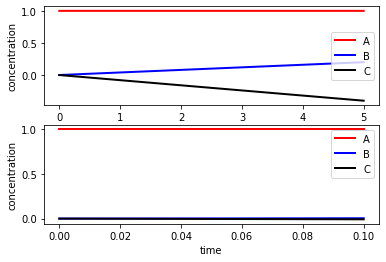

In [155]:
import day_07.Ex2.dormand_prince as dp
# import our Runge-Kutta integrators
import day_07.Ex2.runge_kutta as rk
def Reactor(Conc, t, K , S):
    '''This is the function that does the 
    inputs
        Conc = concentration of species
        t    = time
        k    = rate constants
        S    = Stoichiometry matrix
    '''
    return np.dot(S,Reaction_rates(c,K))
#    return np.dot(S,Reaction_rates(c,K))+np.sin(t)**2 * np.array([1,0,0])
########################################
### hereafter no more code modification necessary
########################################
# Please play around with the step size to study the effect on the solution
h = 1e-3
# time horizon
tspan = (0.0,5.0)


# define dormant_prince_stepper
def dormant_prince_stepper(f,x,t,h):
    return explicit_RK_stepper(f,x,t,h,dp.a,dp.b,dp.c)

trajectory, time_points = integrate(lambda c, t: Reactor(c, t, K, S), 
                                       Conc_0, 
                                       tspan, 
                                       h,
                                       dormant_prince_stepper)

species_names = ["A", "B", "C"]
colors = ["red", "blue", "black"]

fig, axs = plt.subplots(2)
ax = axs[0]
ax.set_xlabel("time")
ax.set_ylabel("concentration")
for i in range(3):
    ax.plot(time_points, [c[i] for c in trajectory],
            color=colors[i], 
            linewidth=2, 
            label = species_names[i])
ax.legend(loc="center right")
fig.savefig("concentration_traces.pdf")

tspan = (0.0,0.1)
trajectory, time_points = rk.integrate(lambda c, t: Reactor(c, t, K, S), 
                                       Conc_0, 
                                       tspan, 
                                       h,
                                       dormant_prince_stepper)

ax = axs[1] 
ax.set_xlabel("time")
ax.set_ylabel("concentration")
for i in range(3):
    ax.plot(time_points, [c[i] for c in trajectory],
            color=colors[i], 
            linewidth=2, 
            label = species_names[i])
ax.legend()
fig.savefig("zoomed_concentration_traces.pdf")


In [161]:
## OTRO PROBLEMA ##
# X --(k1) --> 2X
# X + Y --(k2) --> 2Y
# Y --(k3) --> P
S_1 = np.array([[1,0,0],[-1,1,0],[0,-1,1]]).T
print(S_1)
K = np.array([1,2,1])
Conc = np.array([1,0.25,0])
Reaction_rates = np.array([K[0]*Conc[0],K[1]*Conc[0],Conc[1],K[2]*Conc[2]])
#### LE FALTAN COSAS A ESTO PERO EL FORRO FUE MUY RAPIDO

[[ 1 -1  0]
 [ 0  1 -1]
 [ 0  0  1]]


In [ ]:
import day_07.Ex3.dormand_prince as dp
# import our Runge-Kutta integrators
import day_07.Ex3.runge_kutta as rk

In [162]:
# numpy for fast arrays and some linear algebra.
import numpy as np 
# import matplotlib for plotting
import matplotlib.pyplot as plt
# import Dormand-Prince Butcher tableau
import day_07.Ex3.dormand_prince as dp
# import our Runge-Kutta integrators
import day_07.Ex3.runge_kutta as rk
# import time to measure performance
import time 

# define adaptive Dormand-Prince stepper
def adaptive_dormand_prince_stepper(f,x,t,h):
    return ... # please complete this function 
               # using rk.adaptive_explicit_RK_stepper

def reaction_rates(c,k):
    """
        Function implementing the reaction rate computation of our toy reactor
        
        inputs:
            c - concentration of species A, B, C (numpy array)
            k - rate constants (organized as list)

        outputs:
            reaction rates (numpy array)
    """
    return k*[c[0],c[1],c[2]**2]

def reactor(c,t,k,S):
    """
        Function returing the rhs of our toy reactor model 
        
        inputs:
            c - concentration of species  (numpy array)
            t - time 
            k - rate constants (organized as list)
            S - stoichiometry matrix (numpy array)

        outputs: 
            dc/dt - numpy array
    """
    return S @ reaction_rates(c,k)

# stoichiometry
S = np.array([[-1, 0, 0],
              [1, -1, 1],
              [0, 2, -2]])

# rate coefficients
k = np.array([100.0, 0.25, 1.0])

# initial condition
c_0 = np.array([1.0, 0, 0])

# time horizon
tspan = (0.0,5.0)
# time step 
h = 1e-4

# define Dormand-Prince time stepper
def dormand_prince_stepper(f,x,t,h):
    return rk.explicit_RK_stepper(f,x,t,h,dp.a,dp.b,dp.c)

########################################
### hereafter no more code modification necessary
########################################

# compare performance
t_begin = time.time()
trajectory, time_points = rk.integrate(lambda c, t: reactor(c, t, k, S), 
                                       c_0, 
                                       tspan, 
                                       h,
                                       dormand_prince_stepper)
print("Fixed time step Dormand-Prince method executed in "+str(time.time() - t_begin)+" seconds.")

t_begin = time.time()
trajectory, time_points = rk.adaptive_integrate(lambda c, t: reactor(c, t, k, S), 
                                                c_0, 
                                                tspan, 
                                                h,
                                                adaptive_dormand_prince_stepper)
print("Adaptive Dormand-Prince method executed in "+str(time.time() - t_begin)+" seconds.")



# compare trajectories
tspan = (0.0,0.2)
adaptive_trajectory, adaptive_time_points = rk.adaptive_integrate(lambda c, t: reactor(c, t, k, S), 
                                                                  c_0, 
                                                                  tspan, 
                                                                  h,
                                                                  adaptive_dormand_prince_stepper)

fixed_trajectory, fixed_time_points = rk.integrate(lambda c, t: reactor(c, t, k, S), 
                                                          c_0, 
                                                          tspan, 
                                                          h,
                                                          dormand_prince_stepper)                                               
species_names = ["A", "B", "C"]
colors = ["red", "blue", "black"]

fig, axs = plt.subplots(2)
ax = axs[0]
ax.set_xlabel("time")
ax.set_ylabel("concentration")
for i in range(3):
    ax.plot(fixed_time_points, [c[i] for c in fixed_trajectory],
            color = colors[i], 
            marker = "o",
            linewidth = 2, 
            label = species_names[i])

ax = axs[1]
ax.set_xlabel("time")
ax.set_ylabel("concentration")
for i in range(3):
    ax.plot(adaptive_time_points, [c[i] for c in adaptive_trajectory],
            color = colors[i], 
            marker = "o",
            linewidth = 2, 
            label = species_names[i])
fig.savefig("adaptive_vs_fixed.pdf")



Fixed time step Dormand-Prince method executed in 4.713351726531982 seconds.


TypeError: cannot unpack non-iterable ellipsis object

50
[2.15329236]


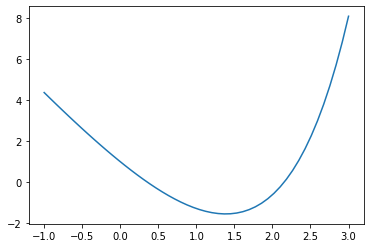

In [203]:
from scipy.optimize import fsolve
def g(x):
    return np.exp(x)-4*x
x_0 = 200
t = np.linspace(-1,3)
print(len(t))
x = fsolve(g,x_0)
plt.plot(t,g(t))
print(x)


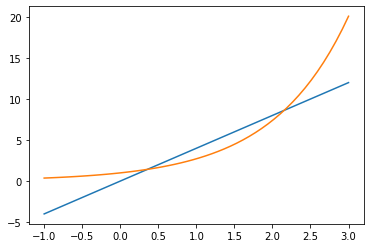

In [204]:
plt.plot(t,4*t)
plt.plot(t,np.exp(t))

In [ ]:
# Excercise 4
#THIS IS THE TOY REACTOR THAT IS GIVEN
# numpy for fast arrays and some linear algebra.
import numpy as np 

#############################
#### setup simulation
#############################

def reaction_rates(c,k):
    """
        Function implementing the reaction rate computation of our toy reactor
        
        inputs:
            c - concentration of species A, B, C (numpy array)
            k - rate constants (organized as list)

        outputs:
            reaction rates (numpy array)
    """
    return k*[c[0],c[1],c[2]**2]

def reactor(c,t,k,S):
    """
        Function returing the rhs of our toy reactor model 
        
        inputs:
            c - concentration of species  (numpy array)
            t - time 
            k - rate constants (organized as list)
            S - stoichiometry matrix (numpy array)

        outputs: 
            dc/dt - numpy array
    """
    return S @ reaction_rates(c,k)


C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\day_07\Ex4\toy_reactor.py:19: RuntimeWarning: overflow encountered in double_scalars
  return k*[c[0],c[1],c[2]**2]
C:\Users\u0142106\Desktop\SpaceWeatherSummerSchool\swsss2023\day_07\Ex4\toy_reactor.py:34: RuntimeWarning: invalid value encountered in matmul
  return S @ reaction_rates(c,k)
C:\workdir\Programs\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-216-f23841052479>:108: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-216-f23841052479>:108: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-216-f23841052

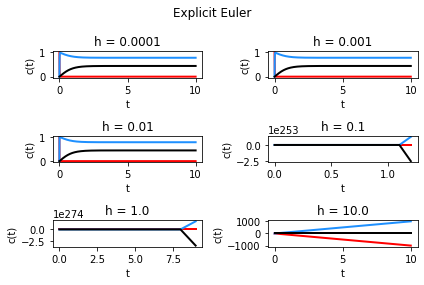

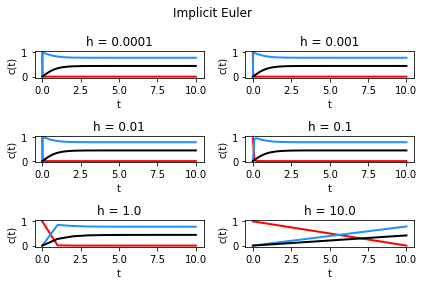

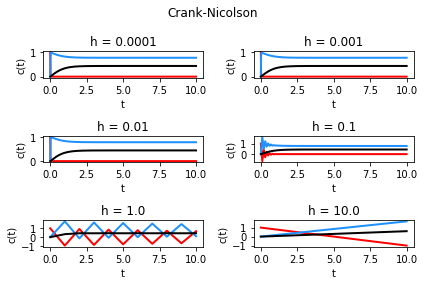

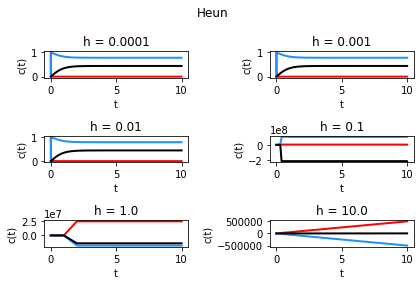

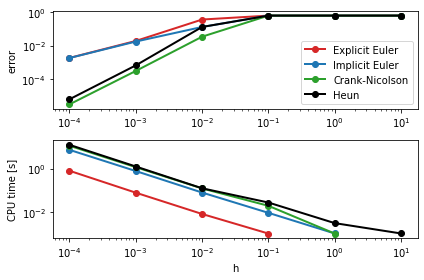

In [216]:
# THIS IS THE INTEGRATOR FILE THAT IS GIVEN
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
import time
import day_07.Ex4.toy_reactor as model
def g(x):
    return np.exp(x)-4*x

def explicit_euler_step(f,x,t,h):
    return x + h * f(x,t)

def implicit_euler_step(f,x,t,h):
    update_rule = lambda x_new : x + h * f(x_new,t+h)-x_new    # ---> this lambda x thingy defines a function inside the function
    x_new = fsolve(update_rule,x)
    #x + h * f(x_next,t_next)-x_next
    return x_new # please complete this function

def crank_nicolson_step(f,x,t,h):
    update_rule = lambda x_new : x + h/2 * (f(x,t)+f(x_new,t+h))-x_new
    x_new       = fsolve(update_rule,x)
    return x_new # please complete this function

def heun_step(f,x,t,h):
    y = x +h*f(x,t)
    update_rule = lambda x_new : x + h/2 * (f(x,t)+f(y,t+h))-x_new
    x_new       = fsolve(update_rule,x)
    return x_new # please complete this function


# after implementing a time stepper, 
# add them to this list.
# Then, run the script and check if the figures are as expected!
integrators = [explicit_euler_step,implicit_euler_step,crank_nicolson_step,heun_step]

####################################
### no modification needed beyond this point
####################################
def integrate(f, x_0, tspan, h, step):
    t, tf = tspan
    x = x_0
    trajectory = [x_0]
    ts = [t]
    while t < tf:
        h_eff = min(h, tf-t)
        x = step(f,x,t,h_eff)
        t = min(t+h_eff, tf)
        trajectory.append(x)
        ts.append(t)
    return trajectory, ts

# stoichiometry matrix 
S = np.array([[-1, 0, 0],
              [1, -1, 1],
              [0, 2, -2]])

k = np.array([100.0, 0.25, 1.0])

x_0 = np.array([1.0, 0.0, 0.0])

h_range = 10**np.linspace(-4,1,6)



#################################
## no need to edit the code below
## this just evaluates the problem
## and makes some interesting plots 
#################################
performance = dict()
for h in h_range:
    for integrator in integrators:
        t0 = time.time()
        sol = integrate(lambda x,t : model.reactor(x,t,k,S), x_0, (0.0,10.0), h, integrator)
        tf = time.time()
        performance[h, integrator, "CPU_time"] = tf-t0
        performance[h, integrator, "sol"] = sol 
   
# compare stability and computational performance
def plot_traces(ax, t_range, sol):
    colors = ["red", "dodgerblue", "black"]
    labels = ["A", "B", "C"]
    for i in range(3):
        ax.plot(t_range, [s[i] for s in sol], color = colors[i], linewidth = 2, label = labels[i])
    ax.set_xlabel("t")
    ax.set_ylabel("c(t)")
    plt.tight_layout()
        
integrator2name = {crank_nicolson_step : "Crank-Nicolson",
                   explicit_euler_step : "Explicit Euler",
                   implicit_euler_step : "Implicit Euler",
                   heun_step : "Heun"}

colors = {integrators[0] : "tab:red",
          integrators[1] : "tab:blue",
          integrators[2] : "tab:green",
          integrators[3] : "black"}

for integrator in integrators:
    fig, axs = plt.subplots(3,2)
    fig.suptitle(integrator2name[integrator])
    for i in range(3):
        for j in range(2):
            h = h_range[i*2+j]
            sol, ts = performance[h, integrator, "sol"]
            axs[i,j].set_title("h = "+str(h))
            plot_traces(axs[i,j], ts, sol)   
    fig.show()
    fig.savefig(integrator2name[integrator]+"_traces.pdf")

def compute_error(sol, ref_sol):
    return sum(np.linalg.norm(sol[i]-ref_sol[i]) for i in range(len(ref_sol)))/len(sol)

benchmark = np.exp(-k[0]*0.01)*x_0[0]
fig, axs = plt.subplots(2)
for i in range(2):
    axs[i].set_yscale('log')
    axs[i].set_xscale('log')

axs[1].set_xlabel('h')
axs[0].set_ylabel('error')
axs[1].set_ylabel('CPU time [s]')
for integrator in integrators:
    times = [performance[h, integrator, "CPU_time"] for h in h_range]
    accuracy = [np.linalg.norm(performance[h, integrator, "sol"][0][round(0.01/h)][0] - benchmark) for h in h_range]
    axs[0].plot(h_range, accuracy, 'o-', color = colors[integrator], linewidth = 2, label = integrator2name[integrator])
    axs[1].plot(h_range, times, 'o-', color = colors[integrator], linewidth = 2)#, label = integrator2name[integrator])
axs[0].legend(loc = 'lower right')
plt.tight_layout()
fig.savefig("integrator_performance.pdf")
fig.show()




In [ ]:
import datetime as datetime
Local_time_datetime = []
Q_euv = np.zeros_like(Q)
Sun_Heat  = 100
Local_time = np.linspace(0,72,73)  # for 3 days
for index in range(len(Local_time)):
    Local_time_datetime.append(datetime.datetime(year = 2000, month = 1, day = 1) +
                               datetime.timedelta(hours = int(Local_time[index])))
Temp_memory = np.zeros([len(Local_time),len(x)])
# a factor that will make Qeuv = 0 [in 0 to 6] and [in 18 - 24] and a sin wave in the rest
factor     =  -np.cos((Local_time/24)*2*np.pi)
#plt.plot(Local_time,factor)

fig = plt.figure(figsize = (10,10),facecolor = 'white')
ax = fig.add_subplot(111)
for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
#plt.plot(Local_time,factor)

for i in range(len(factor)):
    if factor[i] < 0:
        factor[i] = 0
    Q_euv[(x>3) & (x<7)] = Sun_Heat
    Q_tot = Q + Q_euv * factor[i]
    #print(Q_tot)
    D   = Q_tot * (Delta_z2/Lambda)
    #print(D)



# set x with 1 ghost cell on both sides:
    x = np.arange(-dx, 10 + 2 * dx, dx)

    t_lower = 200.0
    t_upper = 1000.0

    nPts = len(x)

    # set default coefficients for the solver:
    a = np.zeros(nPts) - 1
    b = np.zeros(nPts) + 2
    c = np.zeros(nPts) - 1
    d = D

    # boundary conditions (bottom - fixed):
    a[0] = 0
    b[0] = 1
    c[0] = 0
    d[0] = t_lower

    # top - floating boundary:
    a[-1] = 1
    b[-1] = -1
    c[-1] = 0
    d[-1] = t_upper*0

    # Add a source term:

    # solve for Temperature:
    t = solve_tridiagonal(a, b, c, d)

# plot:



    ax.plot(x, t, label = Local_time[i])
    Temp_memory[i]=t
plt.ylabel('Temp')
plt.xlabel('x')
plt.legend(ncols= 6)

plotfile = 'conduction_v1.png'
print('writing : ',plotfile)    
#fig.savefig(plotfile)
plt.show()
plt.close()